In [1]:
import time
import datetime
import pandas_datareader.data as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib

from finquant.portfolio import build_portfolio

In [2]:
cryptos = ['BTC-USD', 'ETH-USD', 'LTC-USD','XLM-USD']

In [3]:
def get_data(tickers, start_date, end_date):  
    # download daily price data for each of the stocks in the portfolio
    df = pdr.get_data_yahoo(tickers, start=start_date, end = end_date)['Adj Close']
    df.sort_index(inplace = True)
    
    return df

In [4]:
#crypto_prices = get_data(cryptos, '01/01/2019', '01/01/2020' )
crypto_prices = get_data(cryptos, '01/01/2020', '19/04/2021' )
print(crypto_prices.head())

Symbols         BTC-USD     ETH-USD    LTC-USD   XLM-USD
Date                                                    
2020-01-01  7200.174316  130.802002  42.017719  0.045451
2020-01-02  6985.470215  127.410179  39.823013  0.044112
2020-01-03  7344.884277  134.171707  42.415573  0.045234
2020-01-04  7410.656738  135.069366  43.326607  0.046272
2020-01-05  7411.317383  136.276779  43.553207  0.045359


In [5]:
# plotting style:
plt.style.use("seaborn-darkgrid")
# set line width
plt.rcParams["lines.linewidth"] = 2
# set font size for titles
plt.rcParams["axes.titlesize"] = 14
# set font size for labels on axes
plt.rcParams["axes.labelsize"] = 12
# set size of numbers on x-axis
plt.rcParams["xtick.labelsize"] = 10
# set size of numbers on y-axis
plt.rcParams["ytick.labelsize"] = 10
# set figure size
plt.rcParams["figure.figsize"] = (10, 6)

In [6]:
pf = build_portfolio(data=crypto_prices)
print(pf)
pf.properties()

Contains information about a portfolio.
----------------------------------------------------------------------
Stocks: BTC-USD, ETH-USD, LTC-USD, XLM-USD
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 1.614
Portfolio Volatility: 0.742
Portfolio Sharpe Ratio: 2.169

Skewness:
    BTC-USD   ETH-USD   LTC-USD   XLM-USD
0  1.384163  1.401848  1.455934  1.543134

Kurtosis:
    BTC-USD   ETH-USD  LTC-USD   XLM-USD
0  0.426574  0.561816  1.03695  1.173807

Information:
   Allocation     Name
0        0.25  BTC-USD
1        0.25  ETH-USD
2        0.25  LTC-USD
3        0.25  XLM-USD
----------------------------------------------------------------------


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


----------------------------------------------------------------------
Optimised portfolio for Minimum Volatility

Time period: 252 days
Expected return: 1.359
Volatility: 0.637
Sharpe Ratio: 2.126

Optimal weights:
             BTC-USD   ETH-USD   LTC-USD   XLM-USD
Allocation  0.877994  0.066114  0.047064  0.008828
----------------------------------------------------------------------
Optimised portfolio for Maximum Sharpe Ratio

Time period: 252 days
Expected return: 1.773
Volatility: 0.751
Sharpe Ratio: 2.354

Optimal weights:
             BTC-USD   ETH-USD  LTC-USD   XLM-USD
Allocation  0.215835  0.652375  0.00343  0.128359
----------------------------------------------------------------------


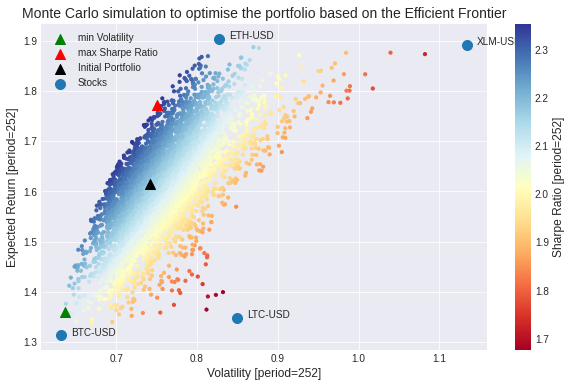

In [7]:
opt_w, opt_res = pf.mc_optimisation(num_trials=5000)
pf.mc_properties()
pf.mc_plot_results()
# again, the individual stocks can be added to the plot
pf.plot_stocks()
plt.show()